<a href="https://colab.research.google.com/github/layesow-gif/Toy_site/blob/main/regression_lin%C3%A9aire_pluit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'carbon-clover-402209' # Project ID inserted based on the query results selected to explore
location = 'EU' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=carbon-clover-402209:EU:bquxjob_7dda9498_18c1b2bdd49)
back to BigQuery to edit the query within the BigQuery user interface.

In [2]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_7dda9498_18c1b2bdd49') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `carbon-clover-402209.projet_lwr.lwr_explo_date_class` 


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [3]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_7dda9498_18c1b2bdd49') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,date_date,clicks,impression,conversions,ads_cost,turnover,CTR,CR,ROAS,rainfall,wind_speed,rain_class
0,2022-04-03,1.07,11.74,0.02,0.08,3.85,0.09,0.02,48.68,0.20,21.64,pas de Pluie
1,2022-03-22,0.96,12.73,0.01,0.09,1.98,0.08,0.01,20.95,0.02,24.39,pas de Pluie
2,2022-01-13,1.42,13.54,0.02,0.10,3.43,0.11,0.01,34.38,0.06,14.90,pas de Pluie
3,2022-01-21,1.05,12.58,0.01,0.19,1.50,0.08,0.01,7.74,0.12,21.37,pas de Pluie
4,2022-02-04,1.45,12.35,0.02,0.12,2.36,0.12,0.01,20.36,0.66,22.73,Pluie faible
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-05-27,2.35,7.44,0.04,0.18,4.34,0.32,0.02,23.55,0.01,18.57,pas de Pluie
361,2022-07-08,2.29,7.27,0.06,0.35,7.56,0.32,0.03,21.53,0.02,21.48,pas de Pluie
362,2022-05-17,1.82,6.06,0.03,0.26,3.20,0.30,0.01,12.49,0.07,17.49,pas de Pluie
363,2022-07-17,2.21,6.25,0.04,0.43,5.02,0.35,0.02,11.80,0.00,19.28,pas de Pluie


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [4]:
results.describe()

,clicks,impression,conversions,ads_cost,turnover,CTR,CR,ROAS,rainfall,wind_speed
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.067041,8.909233,0.034740,0.188055,5.832685,0.258932,0.015945,33.234493,1.491890,20.044740
std,0.798576,2.677660,0.022829,0.083881,4.251827,0.118707,0.007809,21.751172,2.115884,4.702868
min,0.760000,4.510000,0.010000,0.050000,1.020000,0.050000,0.000000,3.620000,0.000000,9.070000
25%,1.290000,7.060000,0.020000,0.120000,2.790000,0.120000,0.010000,17.730000,0.080000,16.890000
50%,2.030000,8.130000,0.030000,0.180000,4.590000,0.300000,0.010000,26.330000,0.460000,19.110000
75%,2.630000,10.250000,0.040000,0.230000,7.440000,0.360000,0.020000,43.650000,2.150000,22.280000
max,4.170000,17.470000,0.160000,0.450000,26.000000,0.470000,0.060000,122.250000,12.750000,39.300000


<Axes: xlabel='rain_class', ylabel='turnover'>

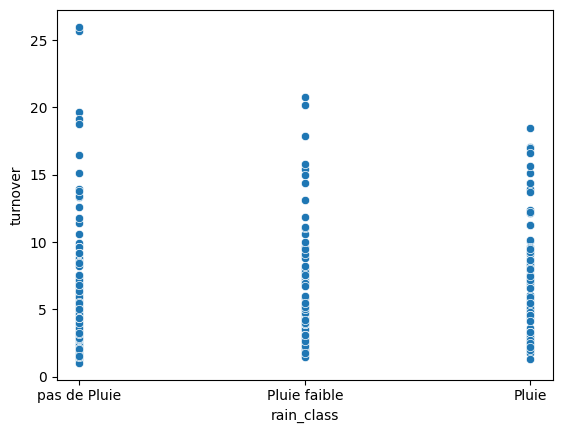

In [6]:
import seaborn as sns
sns.scatterplot(x="rain_class", y="turnover", data=results)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [8]:
X=results[['rainfall']]    # Theorie correlation pluit sur le turnover
Y=results[['turnover']]

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Select only the non numeric columns - see the include argument and the .columns at the end?
non_numeric_columns = X.select_dtypes(exclude=['float64', 'int64']).columns
# Instantiate encoder
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
# concert text to binary features
cat_features = enc.fit_transform(X[non_numeric_columns])
#list categories
enc.categories_
cat_features

array([], shape=(365, 0), dtype=float64)

In [23]:
import numpy as np
cat_features_df = pd.DataFrame(cat_features)

In [26]:

lin_reg=LinearRegression()
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [27]:
lin_reg.score(X_train,Y_train)

0.0371030486597963

In [ ]:
Y_predict=lin_reg.predict(X_test)
Y_predict

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_predict,Y_test)

3.2878224914975127

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(Y_test, y_pred_rf)
mae_rf

<ipython-input-31-03aa4878f9e3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


3.5831738224072254

In [32]:
rf.score(X_train,Y_train)

0.4960410889509941